# Semilla de Braquiterapia

## Distribución espacial de tasa de dosis alrededor de la fuente

### Fuente

<img src="Problema8/BebigI25.S06.png" width="30%">

### Sistema de coordenadas

<img src="Problema8/EsquemaCoordenadas.png" width="50%">

Se considera la distribución simétrica alrededor del eje longitudinal de la fuente, tomamos coordenadas cilíndricas. Además también hay simetría respecto al origen de la fuente con lo que para calcular la distribución de la dosis basta con calcular un cuadrante. Consideraremos que $r$ varía desde 0 hasta infinito y que $\theta$ varía entre 0º y 90º.

### Formalismo

Aproximación 2D
\begin{equation}
    \dot D(r) = S_K \Lambda \frac{G_L(r, \theta)}{G_L(r_0, \theta_0)}g_L(r)F(r, \theta)
\end{equation}

Aproximación 1D, distribución isótropa, fuente puntual
\begin{equation}
    \dot D(r) = S_K \Lambda \frac{G_L(r, \theta_0)}{G_L(r_0, \theta_0)}g_L(r)\phi_{an}(r)
\end{equation}

donde en ambas aproximaciones 
\begin{equation}
G_L(r, \theta)= \left\{ \begin{array}{lcc}
                             \frac{\beta}{Lr\sin(\theta)} & si & \theta \neq 0 \\
                             \frac{1}{r^2-L^2/4} & si & \theta = 0 
                         \end{array}
               \right.
\end{equation}

Para la fuente considerada su longitud efectiva es $L$ = 0.35 cm

Para poder calcular la distribución de tasa de dosis tenemos que calcular $\beta$ en función de $r$ y $\theta$, $\beta = \beta(r, \theta)$.

Por construcción de triángulos es inmediato ver que $\beta = \theta_2 - \theta_1$ y que se verifican las ecuaciones

\begin{equation}
    \theta_1 = \arctan\left( \frac{r \sin (\theta)}{r \cos (\theta) + L/2} \right)
\end{equation}

\begin{equation}
\theta_2 = \left\{ \begin{array}{lcc}
                       \arctan \left(\frac{r \sin(\theta)}{r \cos(\theta)-L/2}\right) & si & r \cos(\theta) > L/2 \\
                       \pi/2 & si & r \cos(\theta) = L/2 \\
                       \pi/2 + \arctan \left(\frac{L/2 + r \cos(\theta)}{r \sin(\theta)}\right) & si & r \cos(\theta) < L/2 
                   \end{array}
           \right.
\end{equation}

De donde obtendríamos $\beta = \beta(r, \theta)$

### Implementación de funciones dosimétricas

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
import pandas as pd
from scipy.interpolate import interp1d as cspline, interp2d

Unidades: longitudes en cm y ángulos en grados sexagesimales

Constante con la longitud efectiva de la fuente

In [ ]:
L = 0.35

Constantes con las coordendas del punto de referencia

In [ ]:
r0, theta0 = 1, 90

Constante para el cambio de grados sexagesimales a radianes

In [ ]:
d_r = np.pi/180

Definimos la función $\beta(r, \theta)$

In [ ]:
def beta(r, theta):
    if r * np.cos(theta) > L/2:
        return np.arctan(r*np.sin(theta)/(r*np.cos(theta)-L/2)) - np.arctan(r*np.sin(theta)/(r*np.cos(theta)+L/2))
    elif r * np.cos(theta) == L/2:
        return np.pi/2 - np.arctan(r*np.sin(theta)/(r*np.cos(theta)+L/2))
    else:
        return (np.pi/2 + np.arctan((L/2-r*np.cos(theta))/r/np.sin(theta)) 
                - np.arctan(r*np.sin(theta)/(r*np.cos(theta)+L/2)))

Definimos la función $G_L(r, \theta)$

In [ ]:
def G_L(r, theta):
    if theta == 0:
        return 1 / (r**2 - L**2/4)
    else:
        return beta(r, theta)/(L * r * np.sin(theta))

Definimos la constante de normalización de la función de geometría $G_L(r_0, \theta_0)$

In [ ]:
G_L_r0_theta0 = G_L(r0, theta0 * d_r)

Vectorizamos la función para facilitar los cálculos posteriores

In [ ]:
G_L_v = np.vectorize(G_L)

Leemos los datos tabulados de las funciones dosimétricas que caracterizan la fuente.

Función de dosis radial $g_L$

In [ ]:
gdf = pd.read_excel('./Problema8/FuncionesDosimetricas.xlsx', sheet_name='g')

In [ ]:
gdf

,r,Lineal,Puntual
0,0.10,1.0100,0.613
1,0.15,1.0180,0.760
2,0.25,1.0300,0.980
3,0.50,1.0300,1.001
4,0.75,1.0200,1.012
5,1.00,1.0000,1.000
6,1.50,0.9370,0.942
7,2.00,0.8570,0.863
8,3.00,0.6890,0.695
9,4.00,0.5380,0.543


Función de anisotropía $\phi_{an}(r)$ para la aproximación 1D

In [ ]:
phiandf = pd.read_excel('./Problema8/FuncionesDosimetricas.xlsx', sheet_name='phi_an')

In [ ]:
phiandf

,r,phi
0,0.25,1.122
1,0.50,0.968
2,1.00,0.939
3,2.00,0.939
4,3.00,0.938
5,4.00,0.940
6,5.00,0.941
7,7.00,0.949


Función $F(r, \theta)$ para el tratamiento 2D

In [ ]:
Fdf = pd.read_excel('./Problema8/FuncionesDosimetricas.xlsx', sheet_name='F')

In [ ]:
Fdf

,theta,0.25,0.5,1,2,3,4,5,7
0,0,0.302,0.429,0.512,0.579,0.610,0.631,0.649,0.684
1,5,0.352,0.436,0.509,0.576,0.610,0.635,0.651,0.689
2,10,0.440,0.476,0.557,0.622,0.651,0.672,0.689,0.721
3,20,0.746,0.686,0.721,0.757,0.771,0.785,0.790,0.807
4,30,0.886,0.820,0.828,0.846,0.857,0.862,0.867,0.874
5,40,0.943,0.897,0.898,0.907,0.908,0.913,0.918,0.912
6,50,0.969,0.946,0.942,0.947,0.944,0.947,0.949,0.946
7,60,0.984,0.974,0.970,0.974,0.967,0.966,0.967,0.976
8,70,0.994,0.989,0.988,0.990,0.984,0.985,0.987,0.994
9,80,0.998,0.998,0.998,1.000,0.994,1.000,0.993,0.999


Definimos la función que devuelve el valor de la tabla para la dosis radial

In [ ]:
def g_L(r):
    return gdf.loc[gdf['r']==r]['Lineal'].values[0]

La vectorizamos

In [ ]:
g_L_v = np.vectorize(g_L)

Definimos la función que devuelve el valor de la tabla para la función de anisotropía 1D $\phi_{an}(r)$

In [ ]:
def phi_an(r):
    return phiandf.loc[phiandf['r']==r]['phi'].values[0]

La vectorizamos

In [ ]:
phi_an_v = np.vectorize(phi_an)

Definimos la función que devuelve el valor de la tabla para la función de anisotropía 2D $F(r, \theta)$

In [ ]:
def F(r, theta):
    return Fdf.loc[Fdf['theta']==theta][r].values[0]

La vectorizamos

In [ ]:
F_v = np.vectorize(F)

Generamos el gráfico con la distribución espacial de la tasa de dosis

Definimos los vectores con el muestreo de $r$ y $\theta$

In [ ]:
rv = np.array([0.25, 0.5, 1., 2., 3.,  4., 5., 7.])
rv

array([0.25, 0.5 , 1.  , 2.  , 3.  , 4.  , 5.  , 7.  ])

In [ ]:
thetav = Fdf['theta'].values
thetav

array([ 0,  5, 10, 20, 30, 40, 50, 60, 70, 80])

In [ ]:
R, Theta = np.meshgrid(rv, thetav * d_r)

In [ ]:
R, ThetaDeg = np.meshgrid(rv, thetav)

Definimos la función de interpolación para la función $g_L$

In [ ]:
g_Lf = cspline(rv, g_L_v(rv), kind='cubic', bounds_error=False, fill_value="extrapolate")

Definimos la función de interpolación para la función $F$

In [ ]:
Ff = interp2d(R, ThetaDeg, F_v(R, ThetaDeg), kind='cubic', bounds_error=False, fill_value=None)

La vectorizamos

In [ ]:
Ffv = np.vectorize(Ff)

Definimos la función de interpolación para la función $\phi_{an}$

In [ ]:
phi_anf = cspline(rv, phi_an_v(rv), kind='cubic', bounds_error=False, fill_value="extrapolate")

La vectorizamos

In [ ]:
phi_anfv = np.vectorize(phi_anf)

### Aproximación 2D

Generamos el mallado cartesiano

In [ ]:
X, Y = R * np.cos(Theta), R * np.sin(Theta)

Generamos el muestreo espacial de la tasa de dosis alrededor de la semilla

In [ ]:
D_rate_2D = G_L_v(R, Theta) / G_L_r0_theta0 * g_L_v(R) * F_v(R, ThetaDeg)

<IPython.core.display.Javascript object>


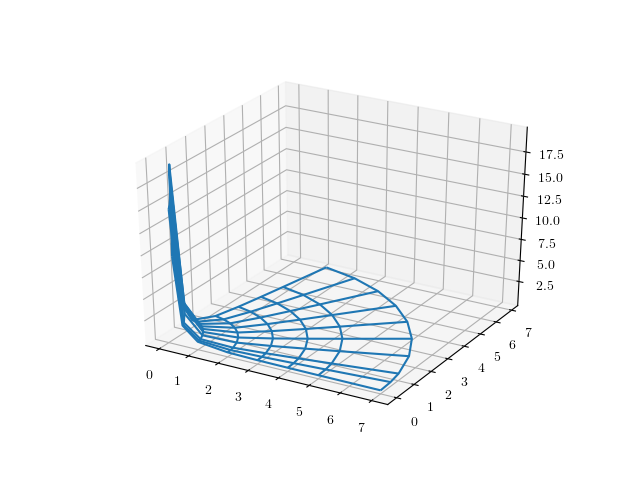

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, D_rate_2D)
plt.show()

Curvas de isovalores, igual tasa de dosis

<IPython.core.display.Javascript object>


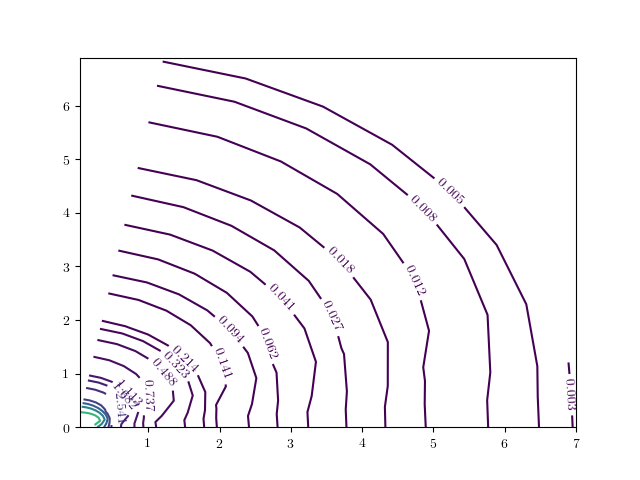

In [ ]:
fig, ax = plt.subplots()
levels = np.geomspace(0.001, 20., 25)
CS = ax.contour(X, Y, D_rate_2D, levels=levels)
ax.clabel(CS, levels, fmt='%4.3f')
plt.show()

Generamos el gráfico de la distribución espacial de la tasa de dosis con una mejor resolución utilizando las funciones de interpolación

/home/usrlantis/devel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  
/home/usrlantis/devel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


<IPython.core.display.Javascript object>


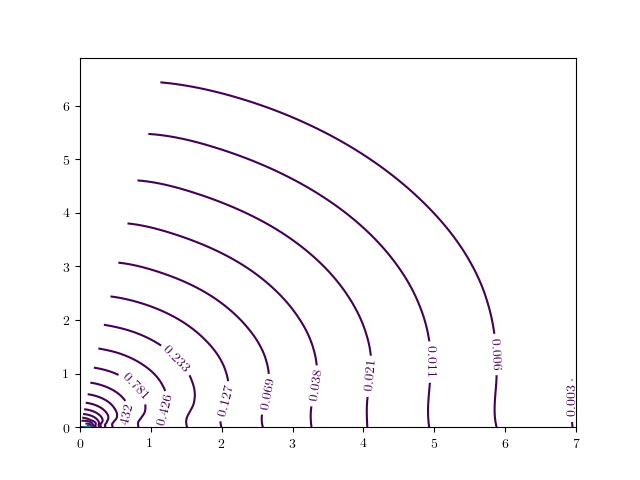

In [ ]:
sv, phiv = np.arange(0, 7.05, 0.1), np.arange(0, 80.05, 1)
S, Phi = np.meshgrid(sv, phiv)
U, V = S * np.cos(Phi*d_r), S * np.sin(Phi*d_r)
D_rate_den_2D = G_L_v(S, Phi*d_r) / G_L_r0_theta0 * g_Lf(S) * Ffv(S, Phi)
fig, ax = plt.subplots()
levels = np.geomspace(0.001, 2050., 25)
CS = ax.contour(U, V, D_rate_den_2D, levels=levels)
ax.clabel(CS, levels, fmt='%4.3f')
plt.show()

Hacemos dos gráficos más aproximándonos a la fuente

/home/usrlantis/devel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  
/home/usrlantis/devel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


<IPython.core.display.Javascript object>


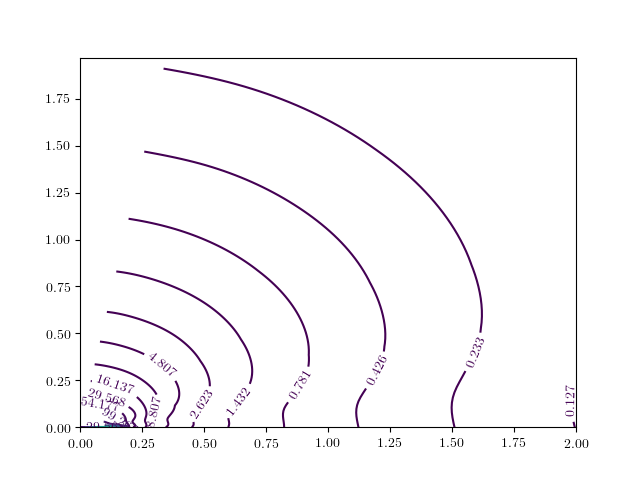

In [ ]:
sv, phiv = np.arange(0, 2.05, 0.1), np.arange(0, 80.05, 1)
S, Phi = np.meshgrid(sv, phiv)
U, V = S * np.cos(Phi*d_r), S * np.sin(Phi*d_r)
D_rate_den_2D_zoom1 = G_L_v(S, Phi*d_r) / G_L_r0_theta0 * g_Lf(S) * Ffv(S, Phi)
fig, ax = plt.subplots()
levels = np.geomspace(0.001, 2050., 25)
CS = ax.contour(U, V, D_rate_den_2D_zoom1, levels=levels)
ax.clabel(CS, levels, fmt='%4.3f')
plt.show()

/home/usrlantis/devel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  
/home/usrlantis/devel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


<IPython.core.display.Javascript object>


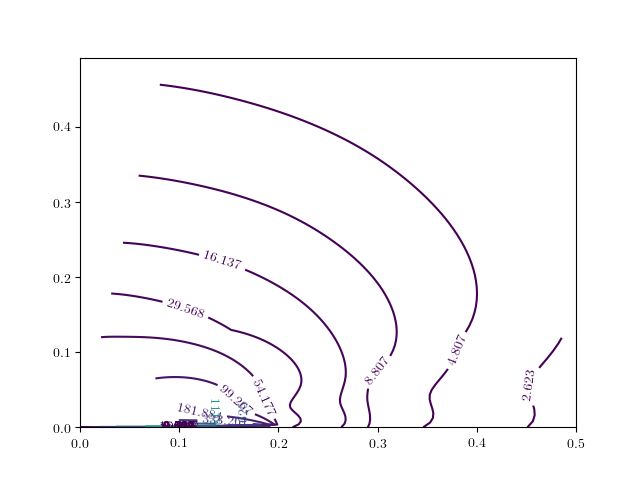

In [ ]:
sv, phiv = np.arange(0, .55, 0.1), np.arange(0, 80.05, 1)
S, Phi = np.meshgrid(sv, phiv)
U, V = S * np.cos(Phi*d_r), S * np.sin(Phi*d_r)
D_rate_den_2D_zoom2 = G_L_v(S, Phi*d_r) / G_L_r0_theta0 * g_Lf(S) * Ffv(S, Phi)
fig, ax = plt.subplots()
levels = np.geomspace(0.001, 2050., 25)
CS = ax.contour(U, V, D_rate_den_2D_zoom2, levels=levels)
ax.clabel(CS, levels, fmt='%4.3f')
plt.show()

### Aproximación 1D

Generamos el muestreo espacial de la tasa de dosis alrededor de la semilla

In [ ]:
D_rate_1D = G_L_v(R, Theta) / G_L_r0_theta0 * g_L_v(R) * phi_an_v(R)

<IPython.core.display.Javascript object>


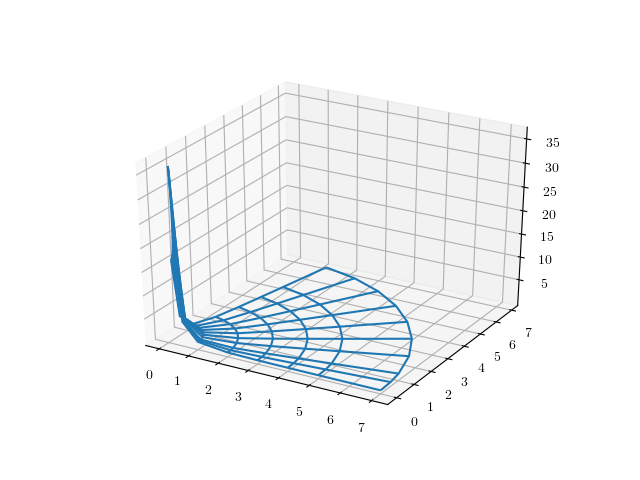

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, D_rate_1D)
plt.show()

Curvas de isovalores, igual tasa de dosis

<IPython.core.display.Javascript object>


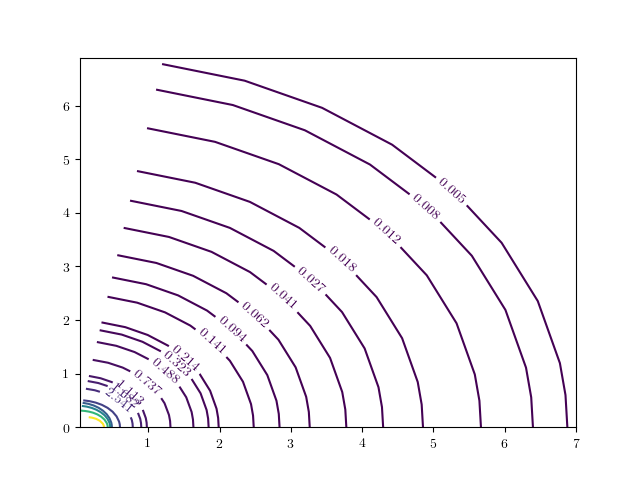

In [ ]:
fig, ax = plt.subplots()
levels = np.geomspace(0.001, 20., 25)
CS = ax.contour(X, Y, D_rate_1D, levels=levels)
ax.clabel(CS, levels, fmt='%4.3f')
plt.show()

/home/usrlantis/devel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  
/home/usrlantis/devel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


<IPython.core.display.Javascript object>


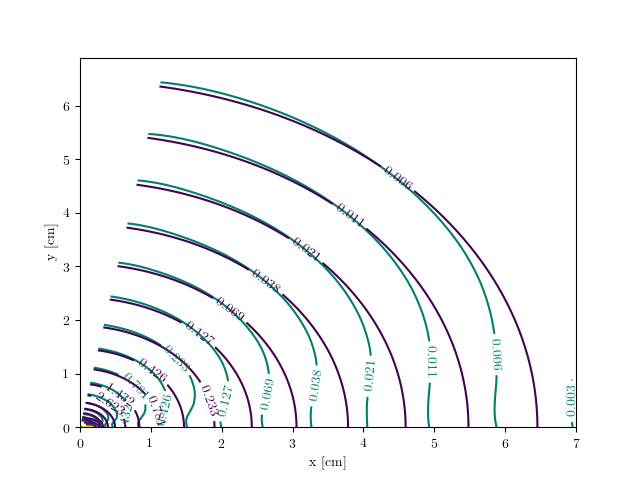

In [ ]:
sv, phiv = np.arange(0, 7.05, 0.1), np.arange(0, 80.05, 1)
S, Phi = np.meshgrid(sv, phiv)
U, V = S * np.cos(Phi*d_r), S * np.sin(Phi*d_r)
D_rate_den_2D = G_L_v(S, Phi*d_r) / G_L_r0_theta0 * g_Lf(S) * Ffv(S, Phi)
D_rate_den_1D = G_L_v(S, Phi*d_r) / G_L_r0_theta0 * g_Lf(S) * phi_anfv(S)
fig, ax = plt.subplots()
levels = np.geomspace(0.001, 2050., 25)
CS2D = ax.contour(U, V, D_rate_den_2D, levels=levels, cmap='summer')
CS1D = ax.contour(U, V, D_rate_den_1D, levels=levels, cmap='viridis')
ax.clabel(CS2D, levels, fmt='%4.3f')
ax.clabel(CS1D, levels, fmt='%4.3f')
ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
plt.show()

fig.savefig('./Problema8/MapaIsovalores.pdf', res=300)

In [ ]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [ ]:
D_rate_2D_axis = G_L_v(S[0], 0) / G_L_r0_theta0 * g_Lf(S[0]) * Ffv(S[0], 0)
D_rate_1D_axis = G_L_v(S[0], 0) / G_L_r0_theta0 * g_Lf(S[0]) * phi_anfv(S[0])
D_rate_2D_80 = G_L_v(S[0], 80*d_r) / G_L_r0_theta0 * g_Lf(S[0]) * Ffv(S[0], 80)
D_rate_1D_80 = G_L_v(S[0], 80*d_r) / G_L_r0_theta0 * g_Lf(S[0]) * phi_anfv(S[0])
D_rate_2D_theta = G_L_v(S[-1][-1], Phi[:,0]*d_r) / G_L_r0_theta0 * g_Lf(S[-1][-1]) * Ffv(S[-1][-1], Phi[:,0])
D_rate_1D_theta = G_L_v(S[-1][-1], Phi[:,0]*d_r) / G_L_r0_theta0 * g_Lf(S[-1][-1]) * phi_anfv(S[-1][-1])

/home/usrlantis/devel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  
/home/usrlantis/devel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


<IPython.core.display.Javascript object>


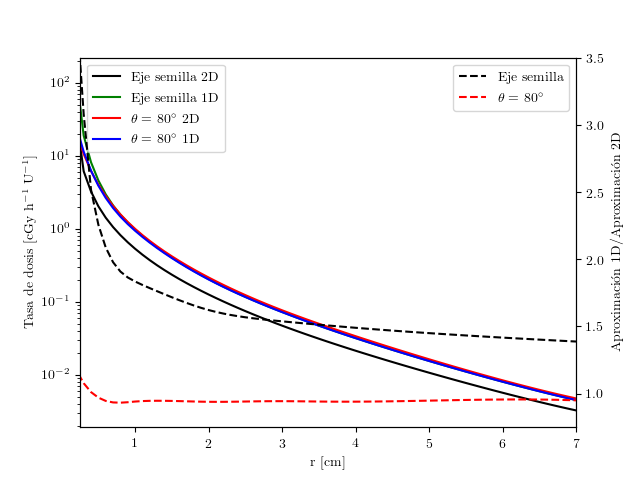

/home/usrlantis/devel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


In [ ]:
fig, ax = plt.subplots()

ap2Dax, = ax.plot(S[0], D_rate_2D_axis, 'k-', label='Eje semilla 2D')
ap1Dax, = ax.plot(S[0], D_rate_1D_axis, 'g-', label='Eje semilla 1D')
ap2D80, = ax.plot(S[0], D_rate_2D_80,   'r-', label=r'$\theta =$ 80$^{\circ}$ 2D')
ap1D80, = ax.plot(S[0], D_rate_1D_80,   'b-', label=r'$\theta =$ 80$^{\circ}$ 1D')

ax.set_xlabel(r'r [cm]')
ax.set_ylabel(r'Tasa de dosis [cGy h${}^{-1}$ U${}^{-1}$]')
ax.set_yscale('log')
ax.set_xlim(.25, 7.)
ax.legend(handles=[ap2Dax, ap1Dax, ap2D80, ap1D80], loc='upper left')

axr = ax.twinx()
apErax, = axr.plot(S[0], (D_rate_1D_axis/D_rate_2D_axis), 'k--', label='Eje semilla')
apEr80, = axr.plot(S[0], (D_rate_1D_80/D_rate_2D_80), 'r--', label=r'$\theta =$ 80$^{\circ}$')
axr.set_xlabel(r'r [cm]')
axr.set_ylabel(r'Aproximación 1D/Aproximación 2D')
axr.set_xlim(.25, 7.)
axr.set_ylim(0.75, 3.5)
axr.legend(handles=[apErax, apEr80], loc='upper right')

plt.tight_layout
plt.show()

fig.savefig('./Problema8/ComparacionEjey80.pdf', res = 300)

<IPython.core.display.Javascript object>


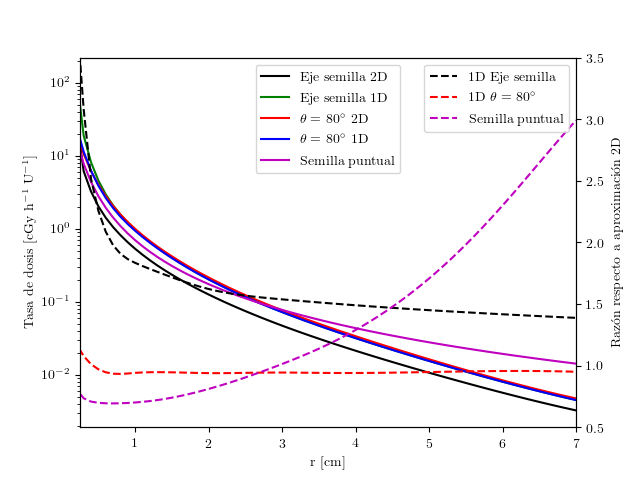

/home/usrlantis/devel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in power
  if __name__ == '__main__':
/home/usrlantis/devel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/usrlantis/devel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in power
/home/usrlantis/devel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


In [ ]:
fig, ax = plt.subplots()

AppStr = 0.7

ap2Dax, = ax.plot(S[0], D_rate_2D_axis, 'k-', label='Eje semilla 2D')
ap1Dax, = ax.plot(S[0], D_rate_1D_axis, 'g-', label='Eje semilla 1D')
ap2D80, = ax.plot(S[0], D_rate_2D_80,   'r-', label=r'$\theta =$ 80$^{\circ}$ 2D')
ap1D80, = ax.plot(S[0], D_rate_1D_80,   'b-', label=r'$\theta =$ 80$^{\circ}$ 1D')
apPoint, = ax.plot(S[0], AppStr*S[0]**-2,   'm-', label=r'Semilla puntual')

ax.set_xlabel(r'r [cm]')
ax.set_ylabel(r'Tasa de dosis [cGy h${}^{-1}$ U${}^{-1}$]')
ax.set_yscale('log')
ax.set_xlim(.25, 7.)
ax.legend(handles=[ap2Dax, ap1Dax, ap2D80, ap1D80, apPoint], loc='upper center')

axr = ax.twinx()
apErax, = axr.plot(S[0], (D_rate_1D_axis/D_rate_2D_axis), 'k--', label='1D Eje semilla')
apEr80, = axr.plot(S[0], (D_rate_1D_80/D_rate_2D_80), 'r--', label=r'1D $\theta =$ 80$^{\circ}$')
apErPt, = axr.plot(S[0], (AppStr*S[0]**-2/D_rate_2D_80), 'm--', label=r'Semilla puntual')
axr.set_xlabel(r'r [cm]')
axr.set_ylabel(r'Razón respecto a aproximación 2D')
axr.set_xlim(.25, 7.)
axr.set_ylim(0.5, 3.5)
axr.legend(handles=[apErax, apEr80, apErPt], loc='upper right')

plt.tight_layout
plt.show()

<IPython.core.display.Javascript object>


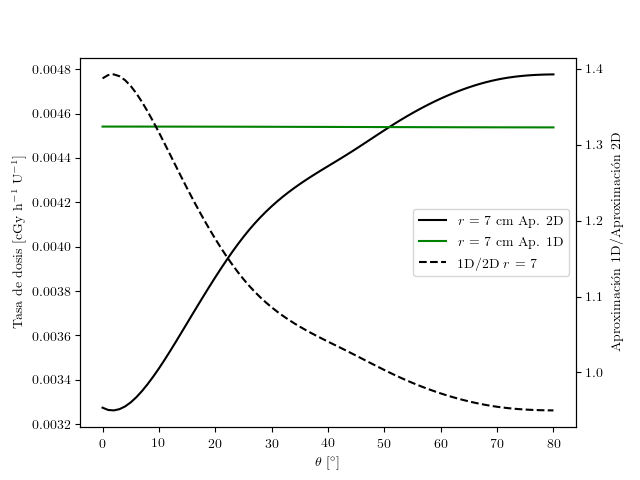

In [ ]:
fig, ax = plt.subplots()

ap2Dtheta, = ax.plot(Phi[:,0], D_rate_2D_theta, 'k-', label='$r$ = 7 cm Ap. 2D')
ap1Dtheta, = ax.plot(Phi[:,0], D_rate_1D_theta, 'g-', label='$r$ = 7 cm Ap. 1D')

ax.set_xlabel(r'$\theta$ [${}^\circ$]')
ax.set_ylabel(r'Tasa de dosis [cGy h${}^{-1}$ U${}^{-1}$]')
#ax.set_yscale('log')

axr = ax.twinx()
apErtheta, = axr.plot(Phi[:,0], (D_rate_1D_theta/D_rate_2D_theta), 'k--', label='1D/2D $r$ = 7')

axr.set_ylabel(r'Aproximación 1D/Aproximación 2D')
ax.legend(handles=[ap2Dtheta, ap1Dtheta, apErtheta], loc='center right')

plt.show()

fig.savefig('./Problema8/ComparacionThetaVar.pdf', res = 300)

Para estimar la incertidumbre generamos una malla de coordendas en la que se puede situar fuentes

In [ ]:
coordv = np.array([[x, y, z] for z in np.arange(-5, 5.1) for y in np.arange(-5, 5.1) for x in np.arange(-5, 5.1)])

In [ ]:
malladf = pd.DataFrame({'x': coordv[:,0], 'y': coordv[:,1], 'z': coordv[:,2]})

In [ ]:
malladf['r'] = np.sqrt(malladf.x**2+malladf.y**2+malladf.z**2)

In [ ]:
msdf = malladf.loc[malladf['r'] < 2.6]

In [ ]:
msdf.reset_index(inplace=True)

In [ ]:
xc, yc, zc = 0.1, 0.1, 0.5
msdf['R'] = np.sqrt((msdf.x-xc)**2+(msdf.y-yc)**2+(msdf.z-zc)**2)
msdf['Theta'] = np.arccos(np.dot(np.array([(msdf.x-xc),(msdf.y-yc),(msdf.z-zc)]).transpose(), np.array([xc, yc, zc]))
                 / 
                msdf['R']
                 /
                np.sqrt(xc**2 + yc**2 + zc**2))/d_r
msdf.loc[msdf.Theta > 90, 'ThetaC'] = 180 - msdf.Theta
msdf.loc[msdf.Theta <= 90, 'ThetaC'] = msdf.Theta
msdf.loc[msdf.ThetaC > 80, 'ThetaC'] = 80
msdf['2D'] = G_L_v(msdf.R, msdf.ThetaC*d_r) / G_L_r0_theta0 * g_Lf(msdf.R) * Ffv(msdf.R, msdf.ThetaC)
msdf['1D'] = G_L_v(msdf.R, msdf.ThetaC*d_r) / G_L_r0_theta0 * g_Lf(msdf.R) * phi_anfv(msdf.R)

/home/usrlantis/devel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/usrlantis/devel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/usrlantis/devel/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [ ]:
msdf['1D'].values.sum(), msdf['2D'].values.sum(), msdf['1D'].values.sum()/msdf['2D'].values.sum()

(27.774232762401194, 24.965465999647574, 1.1125060819130421)

In [ ]:
def unc(v):
    xc, yc, zc = v
    msdf['R'] = np.sqrt((msdf.x-xc)**2+(msdf.y-yc)**2+(msdf.z-zc)**2)
    msdf['Theta'] = np.arccos(np.dot(np.array([(msdf.x-xc),(msdf.y-yc),(msdf.z-zc)]).transpose(), np.array([xc, yc, zc]))
                     / 
                    msdf['R']
                     /
                    np.sqrt(xc**2 + yc**2 + zc**2))/d_r
    msdf.loc[msdf.Theta > 90, 'ThetaC'] = 180 - msdf.Theta
    msdf.loc[msdf.Theta <= 90, 'ThetaC'] = msdf.Theta
    msdf.loc[msdf.ThetaC > 80, 'ThetaC'] = 80
    msdf['2D'] = G_L_v(msdf.R, msdf.ThetaC*d_r) / G_L_r0_theta0 * g_Lf(msdf.R) * Ffv(msdf.R, msdf.ThetaC)
    msdf['1D'] = G_L_v(msdf.R, msdf.ThetaC*d_r) / G_L_r0_theta0 * g_Lf(msdf.R) * phi_anfv(msdf.R) 
    return msdf['1D'].values.sum()/msdf['2D'].values.sum()

In [ ]:
unc(np.array([0.25, 0.25, 0.5]))

/home/usrlantis/devel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/usrlantis/devel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in arccos
  
/home/usrlantis/devel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/usrlantis/devel/anaconda3/lib/python3.7/site-packages/ipy

1.0541686509210557

In [ ]:
rv = np.arange(0.1, 2.7, 0.1)

In [ ]:
uncdv = [unc(np.array([i, i, 0.5])) for i in rv]

/home/usrlantis/devel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/usrlantis/devel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/usrlantis/devel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [ ]:
unclv = [unc(np.array([i, 0.5, 0.5])) for i in rv]

/home/usrlantis/devel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/usrlantis/devel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in arccos
  
/home/usrlantis/devel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/usrlantis/devel/anaconda3/lib/python3.7/site-packages/ipy

In [ ]:
uncav = [unc(np.array([i, 0, 0.5])) for i in rv]

/home/usrlantis/devel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/usrlantis/devel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/usrlantis/devel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [ ]:
from scipy.interpolate import interp1d as cspline

<IPython.core.display.Javascript object>


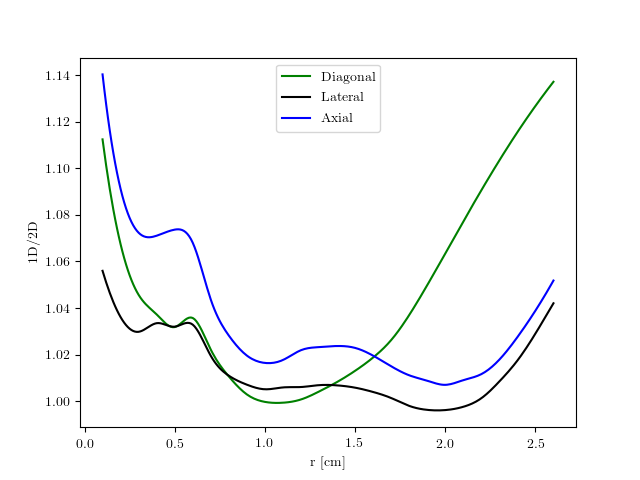

In [ ]:
fig, ax = plt.subplots()

rg = np.arange(rv[0], rv[-1]+0.001, 0.01)
uncdf = cspline(rv, uncdv, kind='cubic')
unclf = cspline(rv, unclv, kind='cubic')
uncaf = cspline(rv, uncav, kind='cubic')
#uncdg, = ax.plot(rv, uncdv, 'g.', label='Diagonal')
uncdgi, = ax.plot(rg, uncdf(rg), 'g-', label='Diagonal')
#unclg, = ax.plot(rv, unclv, 'k.', label='Lateral')
unclgi, = ax.plot(rg, unclf(rg), 'k-', label='Lateral')
#uncag, = ax.plot(rv, uncav, 'b.', label='Axial')
uncagi, = ax.plot(rg, uncaf(rg), 'b-', label='Axial')
ax.set_xlabel(r'r [cm]')
ax.set_ylabel(r'1D/2D')

ax.legend(handles=[uncdgi, unclgi, uncagi], loc='upper center')

plt.show()

fig.savefig('./Problema8/ImplantUncertainty.pdf', res=300)

El error cuadrático medio

In [ ]:
np.sqrt((np.array([uncdv, unclv, uncav])**2).mean())

1.033569406263398